In [4]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import sys
import random
import seaborn as sns
import pandas_profiling #new library!
from sklearn import preprocessing

In [5]:
pd.__version__

'1.0.0'

In [6]:
#https://www.kaggle.com/osmi/mental-health-in-tech-2016 #the atual version

#https://www.kaggle.com/osmi/mental-health-in-tech-survey #our srvey

#1)sub-groups of employes with MH issues? (vunerabylity)?
#2) prejudice against MH issue in work?
#3) MH support schemes in companies? #ok


In [7]:
#ds_project = pd.read_csv('mental-heath-in-tech-2016_20161114.csv')
#ds_project.head()

In [8]:
#ds_project.columns

In [9]:
#ds_project.shape

In [10]:
ds_project = pd.read_csv('survey.csv') #correct dataset
ds_project.head(30)

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN
5,2014-08-27 11:31:22,33,Male,United States,TN,NaN,Yes,No,Sometimes,6-25,...,Don't know,No,No,Yes,Yes,No,Maybe,Don't know,No,NaN
6,2014-08-27 11:31:50,35,Female,United States,MI,NaN,Yes,Yes,Sometimes,1-5,...,Somewhat difficult,Maybe,Maybe,Some of them,No,No,No,Don't know,No,NaN
7,2014-08-27 11:32:05,39,M,Canada,NaN,NaN,No,No,Never,1-5,...,Don't know,No,No,No,No,No,No,No,No,NaN
8,2014-08-27 11:32:39,42,Female,United States,IL,NaN,Yes,Yes,Sometimes,100-500,...,Very difficult,Maybe,No,Yes,Yes,No,Maybe,No,No,NaN
9,2014-08-27 11:32:43,23,Male,Canada,NaN,NaN,No,No,Never,26-100,...,Don't know,No,No,Yes,Yes,Maybe,Maybe,Yes,No,NaN


In [11]:
ds_project.shape

(1259, 27)

In [12]:
ds_project.columns

Index(['Timestamp', 'Age', 'Gender', 'Country', 'state', 'self_employed',
       'family_history', 'treatment', 'work_interfere', 'no_employees',
       'remote_work', 'tech_company', 'benefits', 'care_options',
       'wellness_program', 'seek_help', 'anonymity', 'leave',
       'mental_health_consequence', 'phys_health_consequence', 'coworkers',
       'supervisor', 'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence', 'comments'],
      dtype='object')

In [13]:
ds_project.info() 
#ds_project.describe()  its a quantitative survey

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1259 entries, 0 to 1258
Data columns (total 27 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Timestamp                  1259 non-null   object
 1   Age                        1259 non-null   int64 
 2   Gender                     1259 non-null   object
 3   Country                    1259 non-null   object
 4   state                      744 non-null    object
 5   self_employed              1241 non-null   object
 6   family_history             1259 non-null   object
 7   treatment                  1259 non-null   object
 8   work_interfere             995 non-null    object
 9   no_employees               1259 non-null   object
 10  remote_work                1259 non-null   object
 11  tech_company               1259 non-null   object
 12  benefits                   1259 non-null   object
 13  care_options               1259 non-null   object
 14  wellness

In [14]:
ds_project.dtypes

Timestamp                    object
Age                           int64
Gender                       object
Country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [15]:
ds_project.columns = map(str.lower, ds_project.columns) #putting everything in lower case.
ds_project.dtypes

timestamp                    object
age                           int64
gender                       object
country                      object
state                        object
self_employed                object
family_history               object
treatment                    object
work_interfere               object
no_employees                 object
remote_work                  object
tech_company                 object
benefits                     object
care_options                 object
wellness_program             object
seek_help                    object
anonymity                    object
leave                        object
mental_health_consequence    object
phys_health_consequence      object
coworkers                    object
supervisor                   object
mental_health_interview      object
phys_health_interview        object
mental_vs_physical           object
obs_consequence              object
comments                     object
dtype: object

In [16]:
for col in ds_project.columns:
    print(col,ds_project[col].unique())

timestamp ['2014-08-27 11:29:31' '2014-08-27 11:29:37' '2014-08-27 11:29:44' ...
 '2015-11-07 12:36:58' '2015-11-30 21:25:06' '2016-02-01 23:04:31']
age [         37          44          32          31          33          35
          39          42          23          29          36          27
          46          41          34          30          40          38
          50          24          18          28          26          22
          19          25          45          21         -29          43
          56          60          54         329          55 99999999999
          48          20          57          58          47          62
          51          65          49       -1726           5          53
          61           8          11          -1          72]
gender ['Female' 'M' 'Male' 'male' 'female' 'm' 'Male-ish' 'maile' 'Trans-female'
 'Cis Female' 'F' 'something kinda male?' 'Cis Male' 'Woman' 'f' 'Mal'
 'Male (CIS)' 'queer/she/they' 'non-binary' 'Fem

In [17]:
ds_project.isna().sum()

timestamp                       0
age                             0
gender                          0
country                         0
state                         515
self_employed                  18
family_history                  0
treatment                       0
work_interfere                264
no_employees                    0
remote_work                     0
tech_company                    0
benefits                        0
care_options                    0
wellness_program                0
seek_help                       0
anonymity                       0
leave                           0
mental_health_consequence       0
phys_health_consequence         0
coworkers                       0
supervisor                      0
mental_health_interview         0
phys_health_interview           0
mental_vs_physical              0
obs_consequence                 0
comments                     1095
dtype: int64

In [18]:
#the comments are the column with more nan, and i could dropet, because it wont 
#(at this moment) help me with the answers that i want, but i decided to keep it 
#because can provide me some insigths or how to understand some questions from the survey better.

In [19]:
ds_project[ds_project==0].count()

timestamp                    0
age                          0
gender                       0
country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [20]:
# As i decided to not drop the column comments, i will treat the missing values

mh_cleaning= ds_project.loc[:, [ 'state', 'self_employed', 'work_interfere', 'comments']]
for i in mh_cleaning:
    ds_project[i].fillna(ds_project[i].mode()[0], inplace= True)

mh_cleaning.isna().sum()

ds_project.isna().sum()

timestamp                    0
age                          0
gender                       0
country                      0
state                        0
self_employed                0
family_history               0
treatment                    0
work_interfere               0
no_employees                 0
remote_work                  0
tech_company                 0
benefits                     0
care_options                 0
wellness_program             0
seek_help                    0
anonymity                    0
leave                        0
mental_health_consequence    0
phys_health_consequence      0
coworkers                    0
supervisor                   0
mental_health_interview      0
phys_health_interview        0
mental_vs_physical           0
obs_consequence              0
comments                     0
dtype: int64

In [126]:
ds_project.describe()

,age
count,1259.000000
mean,32.076739
std,7.265061
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


In [22]:
#discovered this amazing library to have a overview from datasets:

ds_project.profile_report()

In [28]:
#the library above show me that is something worg with the age:

print(ds_project["age"].min()) #this print is already after the clean process for the Age
print(ds_project["age"].max())
print(ds_project["age"].mean())
print(pd.isnull(ds_project["age"]).sum())

-1726
99999999999
79428148.31135821
0


In [31]:
#so first let´s clean this part:

#needed to create a function to store this in a variable

def age_ok(age):
    if age>=18 and age<=80:
        return (age)
    else:
        return(np.nan)

        
#for age in ds_project["Age"]:
#    if age>=18 and age<=80:
#        print(age)
#    else:
#        print(np.nan)

        

In [32]:
#ds_project['Age'].unique() # in this case, show me the old column. 
#how to store in a new variable?
#need to apply the func in a variable.

ds_project['age']= ds_project['age'].apply(age_ok)

#ds_project['age'].unique() #there are some Nans

#ds_project['age'].isna().sum() #only 8 fill with mean of ages or drop?

ds_project['age']= ds_project['age'].fillna(ds_project['age'].mean()) 

#to risk to not put in a new variable? The mean is 32.07673860911271 this float number could be a problem as well?
#ds_project['age']

In [128]:
ds_project['age'].describe
#ds_project.describe
ds_project.describe()



,age
count,1259.000000
mean,32.076739
std,7.265061
min,18.000000
25%,27.000000
50%,31.000000
75%,36.000000
max,72.000000


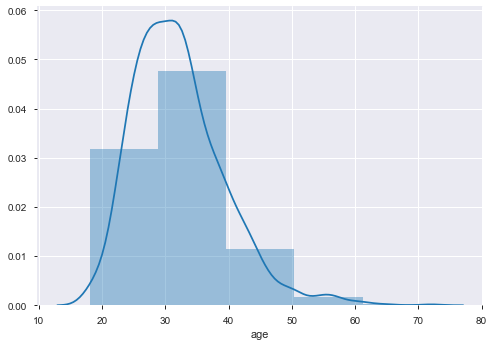

In [123]:
#age_plot = ds_project['Age'].value_counts() 
#print(age_plot) 
#age_plot.plot(kind = 'bar') #brought me all the 49 values
#ds_project['Age'].value_counts().plot(kind='bar')
#ds_project['age'].value_counts().plot.bar()

age_plot= sns.distplot(ds_project['age'], bins=5)

#Show a default plot with a kernel density estimate and histogram 
#with bin size determined automatically with a reference rule.


#Seaborn Class example:
#sns.distplot(vehicles['Fuel Barrels/Year'], bins=20)

plt.savefig('age.png', format='png')

In [36]:
#Gender is a part that need to be clean as well:

ds_project['gender'].unique() 
#len(set(ds_project['gender']))#49

array(['Female', 'M', 'Male', 'male', 'female', 'm', 'Male-ish', 'maile',
       'Trans-female', 'Cis Female', 'F', 'something kinda male?',
       'Cis Male', 'Woman', 'f', 'Mal', 'Male (CIS)', 'queer/she/they',
       'non-binary', 'Femake', 'woman', 'Make', 'Nah', 'All', 'Enby',
       'fluid', 'Genderqueer', 'Female ', 'Androgyne', 'Agender',
       'cis-female/femme', 'Guy (-ish) ^_^', 'male leaning androgynous',
       'Male ', 'Man', 'Trans woman', 'msle', 'Neuter', 'Female (trans)',
       'queer', 'Female (cis)', 'Mail', 'cis male', 'A little about you',
       'Malr', 'p', 'femail', 'Cis Man',
       'ostensibly male, unsure what that really means'], dtype=object)

In [38]:
#will decrease the number of categoried in Gender

ds_project['gender']= ds_project['gender'].replace({'male':'Male', 'm':'Male', 'Male-ish':'Male', 'maile':'Male', 'something kinda male?':'Male', 'Cis Male':'Male', 'Mal':'Male', 
'Mal':'Male', 'Male (CIS)':'Male', 'Make':'Male','male leaning androgynous':'Others', 'Man':'Male', 'msle':'Male', 'Mail':'Male', 
'cis male':'Male', 'Malr':'Male', 'Cis Man':'Male','ostensibly male, unsure what that really means':'Male', 'M':'Male','Female':'Female', 'female':'Female', 'Cis Female':'Female',
'F':'Female', 'Woman':'Female', 'f':'Female', 'Femake':'Female','woman':'Female', 'Female ':'Female', 'cis-female/femme':'Female', 
'Female (cis)':'Female', 'femail':'Female', 'Male ':'Male','Trans-female': 'Female(Trans)', 'Trans woman': 'Female(Trans)','Female (trans)': 'Female(Trans)', 
'queer/she/they':'Others','non-binary':'Others', 'Nah':'Others', 'All':'Others', 'Enby':'Others', 'fluid':'Others', 'Genderqueer':'Others', 'Androgyne':'Others','Agender':'Others', 
'Guy (-ish) ^_^':'Others', 'Neuter':'Others', 'queer':'Others', 'A little about you':'Others', 'p':'Others'})

ds_project['gender']


#ds_project.groupby('Gender').count() #993 Males, 251  Female,  15 Others



0       Female
1         Male
2         Male
3         Male
4         Male
         ...  
1254      Male
1255      Male
1256      Male
1257    Female
1258      Male
Name: gender, Length: 1259, dtype: object

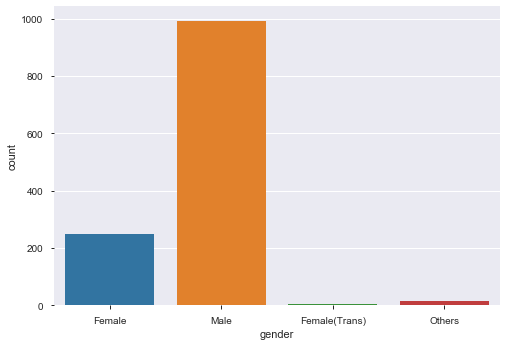

In [125]:
#gender_plot= sns.distplot(ds_project['Gender']) #could not convert string to float: 'Female'


sns.countplot(ds_project['gender'])

#sns.countplot(ds_project['care_options'])

#since the survey is from 2014 in tech, not surprising that the number of males are almost 4 times more than the female presence.

plt.savefig('gender.png', format='png')

In [41]:
#want to see age and gender togheter

#age_gender = ds_project.groupby(["Gender"]).mean()
#age_gender.head()

age_gender = ds_project.groupby(["gender"]).agg({"age": "mean"}) #.agg - Aggregate these functions over the rows, worked since age is int64 
age_gender.head()

#Challenge3 do Dataframe calculations:
#age_gender = orders.groupby(["CustomerID"]).agg({"amount_spent": 'sum'}) #.agg - Aggregate these functions over the rows
#amaount_by_customer.head()


,age
gender,
Female,30.931174
Female(Trans),29.000000
Male,32.398171
Others,30.482014


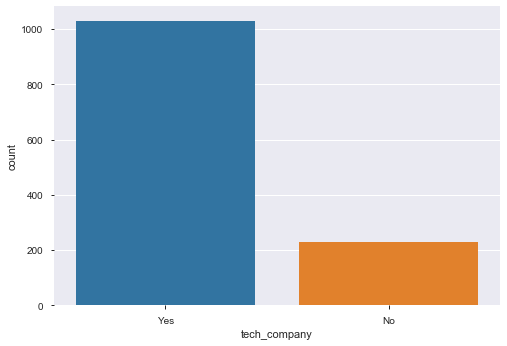

In [124]:
sns.countplot(ds_project['tech_company'])

ds_project['tech_company'].value_counts() 

plt.savefig('tech_companie.png', format='png')



My Codebook:

Timestamp

Age

Gender

Country

state: If you live in the United States, which state or territory do you live in?

self_employed: Are you self-employed?

family_history: Do you have a family history of mental illness?

treatment: Have you sought treatment for a mental health condition?

work_interfere: If you have a mental health condition, do you feel that it interferes with your work?

no_employees: How many employees does your company or organization have?

remote_work: Do you work remotely (outside of an office) at least 50% of the time?

tech_company: Is your employer primarily a tech company/organization?

#benefits: Does your employer provide mental health benefits?

#care_options: Do you know the options for mental health care your employer provides?

#wellness_program: Has your employer ever discussed mental health as part of an employee wellness program?

#seek_help: Does your employer provide resources to learn more about mental health issues and how to seek help?

anonymity: Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources?

#leave: How easy is it for you to take medical leave for a mental health condition?

##mental_health_consequence: Do you think that discussing a mental health issue with your employer would have negative consequences?

phys_health_consequence: Do you think that discussing a physical health issue with your employer would have negative consequences?

##coworkers: Would you be willing to discuss a mental health issue with your coworkers?

##supervisor: Would you be willing to discuss a mental health issue with your direct supervisor(s)?

##mental_health_interview: Would you bring up a mental health issue with a potential employer in an interview?

phys_health_interview: Would you bring up a physical health issue with a potential employer in an interview?

##mental_vs_physical: Do you feel that your employer takes mental health as seriously as physical health?

obs_consequence: Have you heard of or observed negative consequences for coworkers with mental health conditions in your workplace?

comments: Any additional notes or comments

In [116]:
#3) MH support schemes in companies:

ds_support_schemes = ds_project[['treatment','benefits', 'care_options','wellness_program', 'seek_help', 'leave', 'mental_health_consequence', 'coworkers',  'mental_vs_physical', 'mental_health_interview']]
ds_support_schemes.head(10)

#indexer = self.columns.get_loc(key)

,treatment,benefits,care_options,wellness_program,seek_help,leave,mental_health_consequence,coworkers,mental_vs_physical,mental_health_interview
0,Yes,Yes,Don't know,No,Yes,Somewhat easy,No,Some of them,Yes,No
1,No,Don't know,No,Don't know,Don't know,Don't know,Maybe,No,Don't know,No
2,No,No,No,No,No,Somewhat difficult,No,Yes,No,Yes
3,Yes,No,Yes,No,No,Somewhat difficult,Yes,Some of them,No,Maybe
4,No,Yes,No,Don't know,Don't know,Don't know,No,Some of them,Don't know,Yes
5,No,Yes,Don't know,No,Don't know,Don't know,No,Yes,Don't know,No
6,Yes,No,No,No,No,Somewhat difficult,Maybe,Some of them,Don't know,No
7,No,No,Yes,No,No,Don't know,No,No,No,No
8,Yes,Yes,Yes,No,No,Very difficult,Maybe,Yes,No,No
9,No,Don't know,No,Don't know,Don't know,Don't know,No,Yes,Yes,Maybe


In [ ]:
#ds_support_schemes_complete = ds_support_schemes.rename(columns={'treatment': 'Have you sought treatment for a mental health condition?', 
#                                                'benefits': 'Does your employer provide mental health benefits?',
#                                                'care_options': 'Do you know the options for mental health care your employer provides?',
#                                                'wellness_program' :'Has your employer ever discussed mental health as part of an employee wellness program?',
#                                               'seek_help': 'Does your employer provide resources to learn more about mental health issues and how to seek help?', 
#                                                'leave':'How easy is it for you to take medical leave for a mental health condition?', 
#                                                'mental_health_consequence': 'Do you think that discussing a mental health issue with your employer would have negative consequences?',
#                                                'coworkers': 'Would you be willing to discuss a mental health issue with your coworkers?', 
#                                                'mental_vs_physical': 'Do you feel that your employer takes mental health as seriously as physical health?'})
#ds_support_schemes_complete

#didn´t need to do that, but i though that could be easy to see the questions...



In [149]:

#ds_support_schemes['treatment'].unique
#print(pd.isnull(ds_support_schemes['treatment']).sum())

ds_support_schemes.groupby('treatment').count()

#support_schemes_MH = ds_support_schemes.groupby(['treatment']).agg({'benefits': 'sum', 'care_options': 'sum', 'wellness_program': 'sum'}) #.agg - Aggregate these functions over the rows
#support_schemes_MH.head()


ds_project['treatment'].value_counts()

#sns.countplot(ds_project['treatment'])

#ds_project['treatment'].value_counts() 

#plt.savefig('treatment.png', format='png')

Yes    637
No     622
Name: treatment, dtype: int64

In [90]:
#for my study i decide to use treatment as a 'key', analysing people who said Yes for the treatment question, 
#because they are more likely to know about the employers questions:

#provindo theory with numbers:

#pd.pivot_table(ds_project, index= [ 'treatment'], values= ['benefits'], columns=['care_options'],aggfunc= 'count')
#pd.pivot_table(ds_project, index= ['treatment'], values= ['wellness_program'], columns=['seek_help'],aggfunc= 'count')
#pd.pivot_table(ds_project, index= [ 'treatment' ], values= ['benefits'], columns=['leave'],aggfunc= 'count') #383 answers (yes x 313 no)

#pd.pivot_table(ds_project, index= ['treatment', 'benefits' ], values= ['care_options'], aggfunc= 'count')

#couldnt use the pivot table yet, because the numbers that i wanted doesn´t match.

#https://en.wikipedia.org/wiki/Pivot_table
#https://www.vooo.pro/insights/pivot-table-em-pandas-explicado/
#pd.pivot_table(df,index=["Manager","Rep"],values=["Price"],columns=["Product"],aggfunc=[np.sum])

In [91]:
#trying to understand the pivot table and the results below - the code above worked better:

#ds_project.groupby(by=["treatment", "benefits", "care_options"]).count()

#ds_project.groupby(by=["leave"]).count()

ds_project.groupby(by=["treatment", "seek_help", "wellness_program"]).count()

timestamp  age  gender  country  state  \
treatment seek_help  wellness_program                                           
No        Don't know Don't know               81   81      81       81     81   
                     No                       98   98      98       98     98   
                     Yes                      18   18      18       18     18   
          No         Don't know               10   10      10       10     10   
                     No                      300  300     300      300    300   
                     Yes                      13   13      13       13     13   
          Yes        Don't know               16   16      16       16     16   
                     No                       24   24      24       24     24   
                     Yes                      62   62      62       62     62   
Yes       Don't know Don't know               57   57      57       57     57   
                     No                       87   87      87       87     87   
                     Yes                      22   22      22       22     22   
          No         Don't know               11   11      11       11     11   
                     No                      297  297     297      297    297   
                     Yes                      15   15      15       15     15   
          Yes        Don't know               13   13      13       13     13   
                     No                       36   36      36       36     36   
                     Yes                      99   99      99       99     99   

                                       self_employed  family_history  \
treatment seek_help  wellness_program                                  
No        Don't know Don't know                   81              81   
                     No                           98              98   
                     Yes                          18              18   
          No         Don't know                   10              10   
                     No                          300             300   
                     Yes                          13              13   
          Yes        Don't know                   16              16   
                     No                           24              24   
                     Yes                          62              62   
Yes       Don't know Don't know                   57              57   
                     No                           87              87   
                     Yes                          22              22   
          No         Don't know                   11              11   
                     No                          297             297   
                     Yes                          15              15   
          Yes        Don't know                   13              13   
                     No                           36              36   
                     Yes                          99              99   

                                       work_interfere  no_employees  \
treatment seek_help  wellness_program                                 
No        Don't know Don't know                    81            81   
                     No                            98            98   
                     Yes                           18            18   
          No         Don't know                    10            10   
                     No                           300           300   
                     Yes                           13            13   
          Yes        Don't know                    16            16   
                     No                            24            24   
                     Yes                           62            62   
Yes       Don't know Don't know                    57            57   
                     No                            87            87   
                     Yes                           22 

In [ ]:
#i will try to put all the answers in the same patters: 
#Yes, No and Don't Know. In this case from the "care_options",(the only one different) "not sure" will be "don´t know":

In [92]:
ds_project["care_options"].value_counts()

No            501
Yes           444
Don't know    314
Name: care_options, dtype: int64

In [68]:
ds_project['care_options']= ds_project['care_options'].replace({"Not sure":"Don't know"})

ds_project['care_options']


0       Don't know
1               No
2               No
3              Yes
4               No
           ...    
1254            No
1255           Yes
1256           Yes
1257           Yes
1258           Yes
Name: care_options, Length: 1259, dtype: object


BENEFITS
Yes           477
Don't know    408
No            374
Name: benefits, dtype: int64


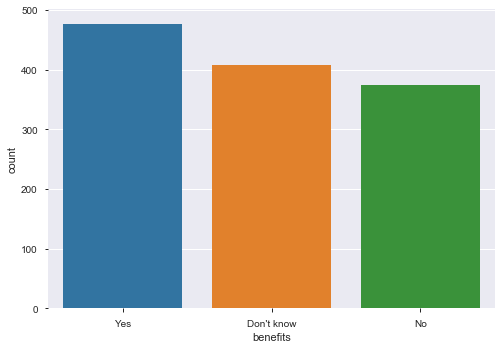


CARE_OPTIONS
No          501
Yes         444
Not sure    314
Name: care_options, dtype: int64


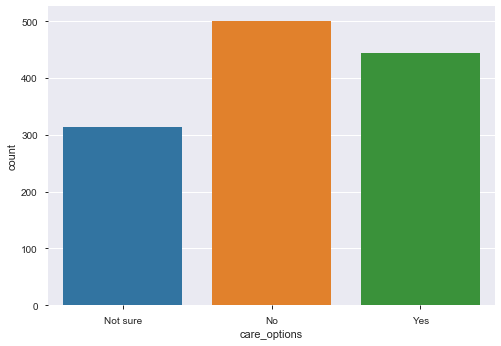


WELLNESS_PROGRAM
No            842
Yes           229
Don't know    188
Name: wellness_program, dtype: int64


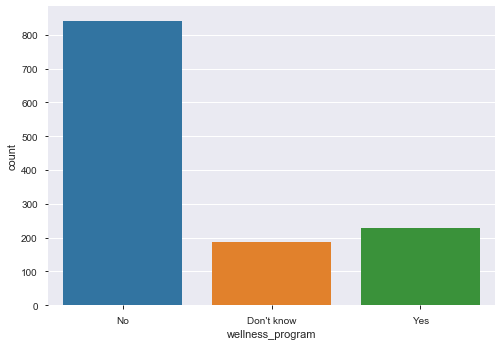


SEEK_HELP
No            646
Don't know    363
Yes           250
Name: seek_help, dtype: int64


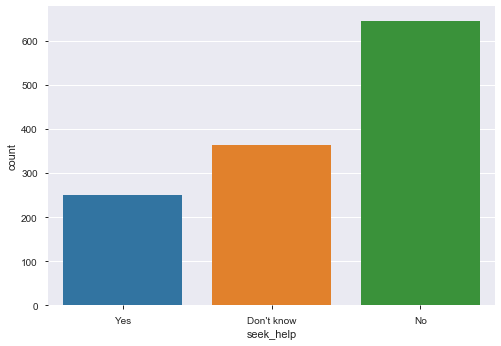


ANONYMITY
Don't know    819
Yes           375
No             65
Name: anonymity, dtype: int64


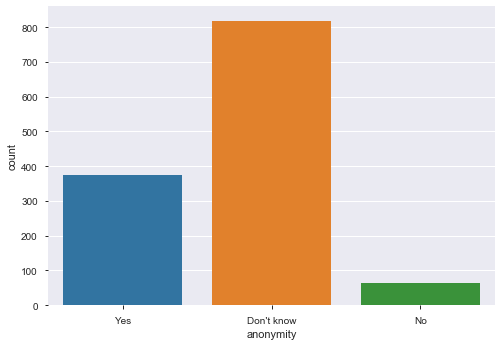


LEAVE
Don't know            563
Somewhat easy         266
Very easy             206
Somewhat difficult    126
Very difficult         98
Name: leave, dtype: int64


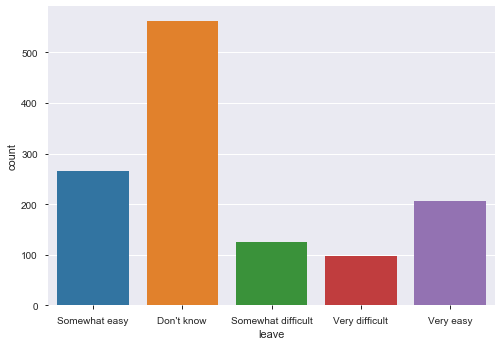

In [183]:
# Let's see the categories of each variable related to mental health services

categories = ds_project.loc[:,'benefits':'leave'].select_dtypes(include=['object'])
for i in categories:
    column = categories[i]
    print('\n'+ i.upper())
    print(column.value_counts())
    sns.countplot(data=categories, x=column)
    plt.xticks(rotation=0)
    plt.show()
    
    
    
ax = sns.countplot(x="class", hue="who", data=titanic) # for Seaborn version 0.7 and more
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total),
            ha="center") 

#found this way of plot all the categories at once in another kaggle analysis.

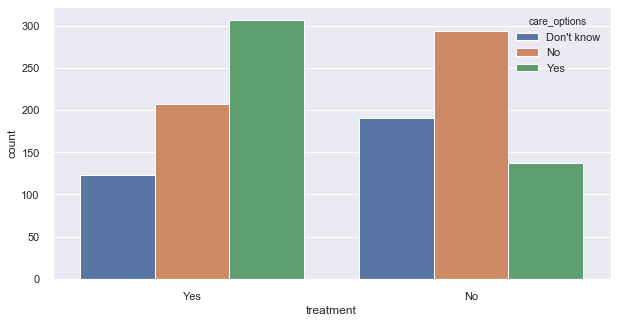

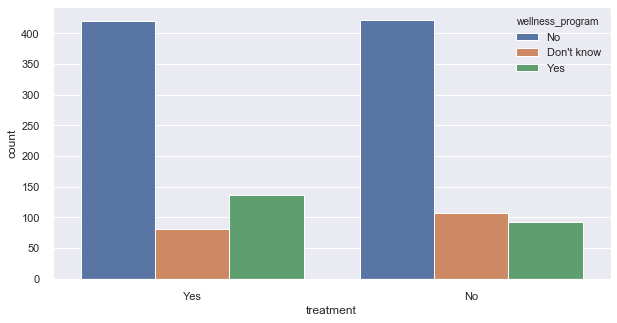

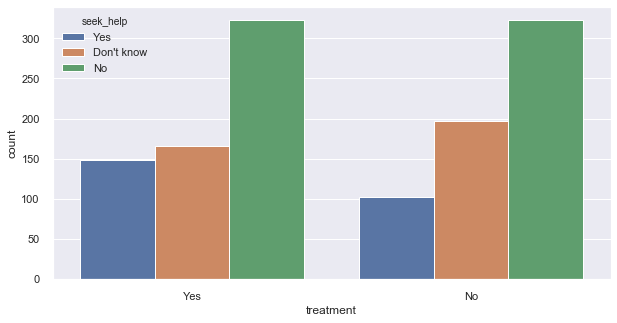

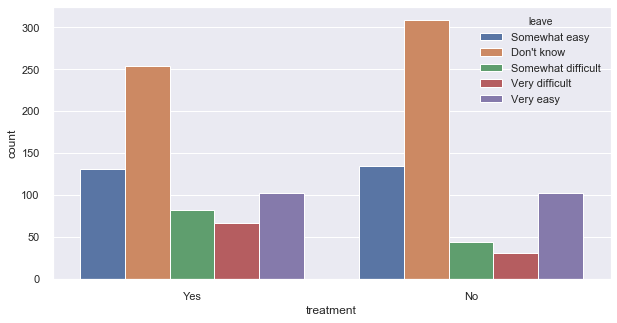

In [155]:
#showing all the categories, compared with the treatment part:

#plt.figure(figsize=(10,5))
#sns.countplot(x= 'treatment', hue= 'benefits', data= ds_project )
#plt.savefig('treatment_x_benefits.png', format='png')

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'care_options', data= ds_project )
plt.savefig('treatment_x_care_options.png', format='png')

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'wellness_program', data= ds_project )
plt.savefig('treatment_x_wellness_program.png', format='png')

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'seek_help', data= ds_project )
plt.savefig('treatment_x_seek_help.png', format='png')

plt.figure(figsize=(10,5))
ax= sns.countplot(x= 'treatment', hue= 'leave', data= ds_project )
plt.savefig('treatment_x_leave.png', format='png')

#attempt to put % in the bars:

#sns.set(style="darkgrid")
#leave = sns.load_dataset("ds_project")
#total = leave # one person per row 
#ax= sns.countplot(x= 'treatment', hue= 'leave', data= ds_project )
#for p in ax.patches:
   # height = p.get_height()
    #ax.text(p.get_x()+p.get_width()/2.,
    #        height + 3,'{:1.2f}'.format(height/total),
    #        ha="center") 
#show()

# People who have sought treatment for a mental health condition, know more about health benefits provide for the employers.


#https://seaborn.pydata.org/generated/seaborn.countplot.html

# i tryed with x and y and an error: Cannot pass values for both `x` and `y`
#couldnt put the % in the bars.


MENTAL_HEALTH_CONSEQUENCE
No       490
Maybe    477
Yes      292
Name: mental_health_consequence, dtype: int64


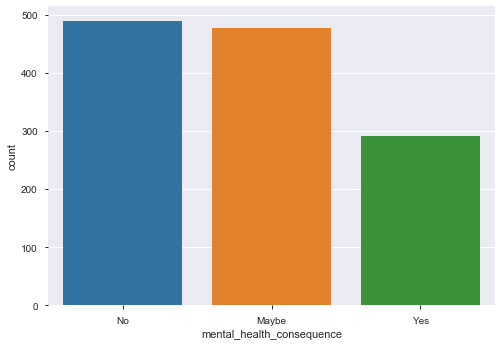


PHYS_HEALTH_CONSEQUENCE
No       925
Maybe    273
Yes       61
Name: phys_health_consequence, dtype: int64


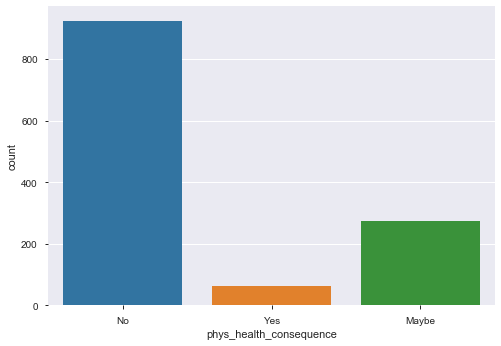


COWORKERS
Some of them    774
No              260
Yes             225
Name: coworkers, dtype: int64


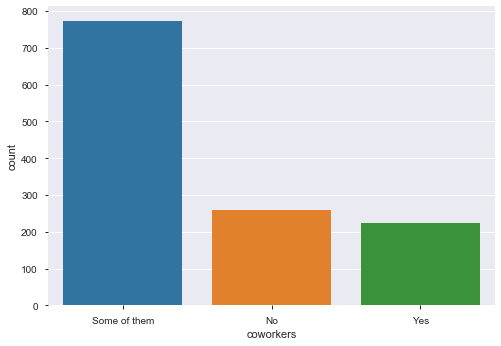


SUPERVISOR
Yes             516
No              393
Some of them    350
Name: supervisor, dtype: int64


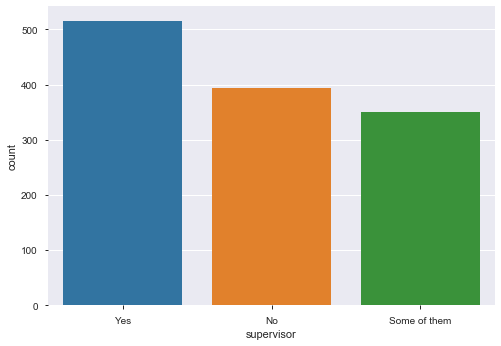


MENTAL_HEALTH_INTERVIEW
No       1008
Maybe     207
Yes        44
Name: mental_health_interview, dtype: int64


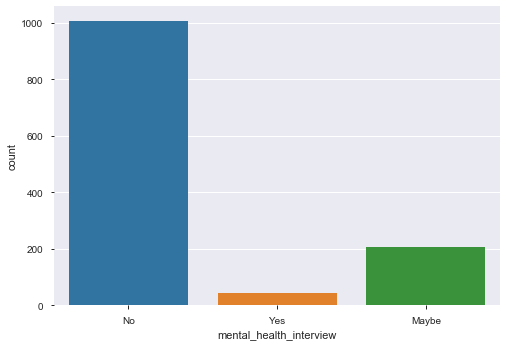


PHYS_HEALTH_INTERVIEW
Maybe    557
No       500
Yes      202
Name: phys_health_interview, dtype: int64


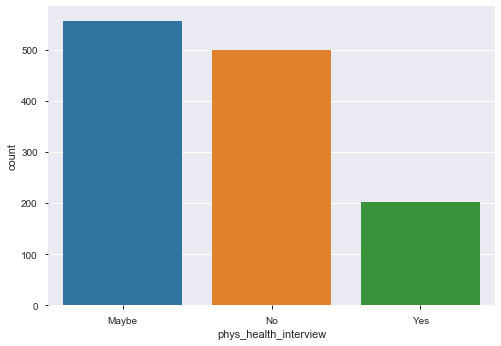


MENTAL_VS_PHYSICAL
Don't know    576
Yes           343
No            340
Name: mental_vs_physical, dtype: int64


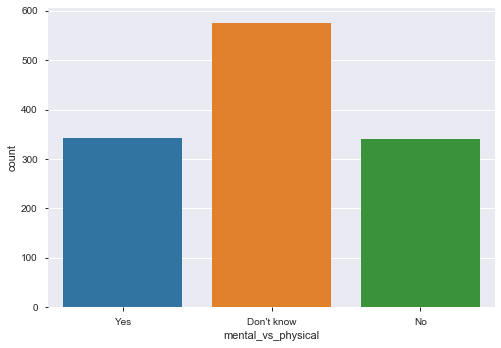


OBS_CONSEQUENCE
No     1075
Yes     184
Name: obs_consequence, dtype: int64


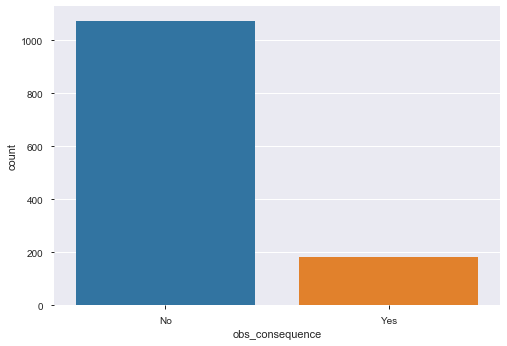

In [105]:
# Let's see the categories of each variable related to how people fell about mental health in workspace:

feelings = ds_project.loc[:,'mental_health_consequence':'obs_consequence'].select_dtypes(include=['object'])
for i in feelings:
    column = feelings[i]
    print('\n'+ i.upper())
    print(column.value_counts())
    sns.countplot(data=feelings, x=column)
    plt.xticks(rotation=0)
    plt.show()

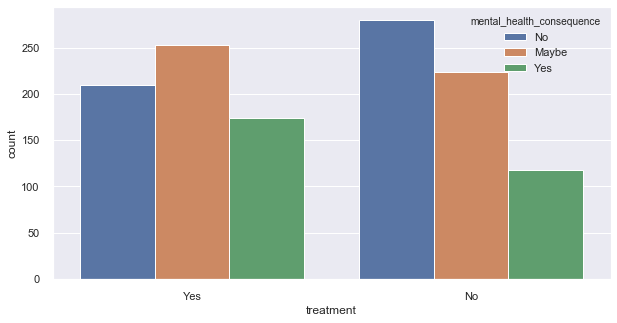

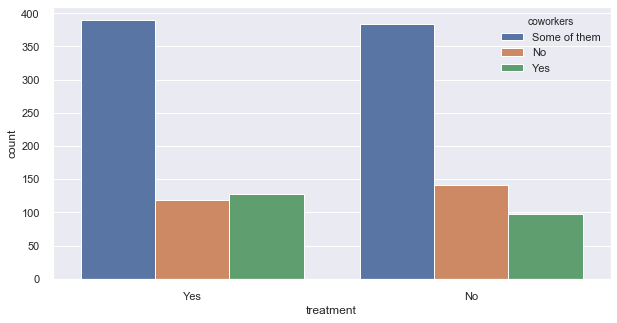

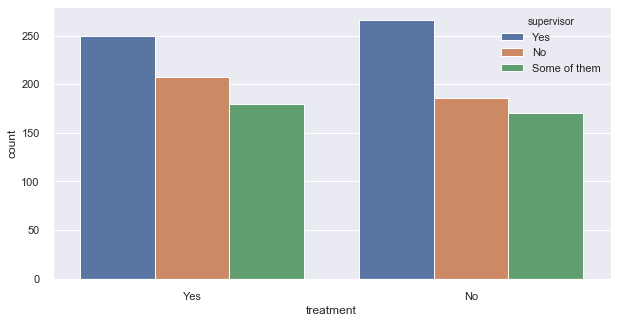

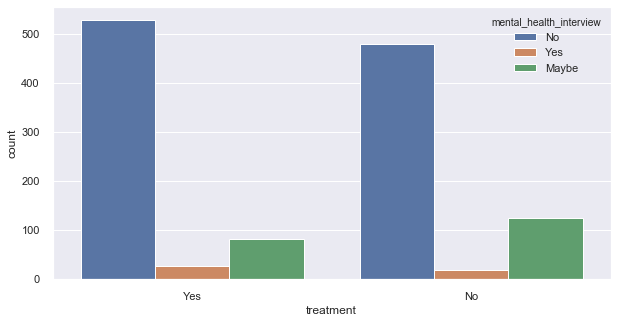

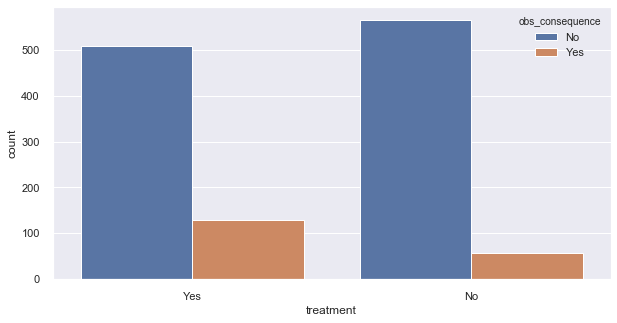

In [161]:
#showing all the categories, compared with the feeling part:

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'mental_health_consequence', data= ds_project )
plt.savefig('treatment_x_mental_health.png', format='png')

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'coworkers', data= ds_project )
plt.savefig('treatment_x_coworkers.png', format='png')

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'supervisor', data= ds_project )
plt.savefig('treatment_x_mental_health.png', format='png')

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'mental_health_interview', data= ds_project )
plt.savefig('treatment_x_mental_health_interview.png', format='png')

#Do you feel that your employer takes mental health as seriously as physical health?
#plt.figure(figsize=(10,5))
#sns.countplot(x= 'treatment', hue= 'mental_vs_physical', data= ds_project )

plt.figure(figsize=(10,5))
sns.countplot(x= 'treatment', hue= 'obs_consequence', data= ds_project )
plt.savefig('treatment_x_obs_consequenc.png', format='png')


#plt.figure(figsize=(10,5))
#sns.countplot(x= 'treatment', hue= 'leave', data= ds_project )
